In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Draw


import math
%matplotlib inline

# Database extraction

In [2]:
DF_smiles = pd.read_csv('DF_GI50_IC50_grouped.csv', sep = ',', header = [0, 1])
#DF_smiles['aaa'] = 1

In [3]:
DF_smiles.columns = ['molregNoMin', 'molregNoCount', 'chemblSmiles', 'standardMin', 'standardMax', 'standardMean',
                     'publishedMain', 'publishedMax', 'publishedMean']

In [4]:
DF_smiles.head(10)

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean
0,10,2,C1CCCCCNc2cc[n+](Cc3cccc(c3)c4cccc(C[n+]5ccc(N...,110.0000,110.0000,110.0000,0.11,110.00,55.055000
1,23,12,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,100.0000,34000.0000,10724.0775,-5.00,140.00,27.733333
2,24,1,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,30.0000,30.0000,30.0000,30.00,30.00,30.000000
3,25,1,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,95.0000,95.0000,95.0000,95.00,95.00,95.000000
4,26,1,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,190.0000,190.0000,190.0000,190.00,190.00,190.000000
5,31,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4CC4c5c...,0.5129,0.5129,0.5129,9.29,9.29,9.290000
6,33,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)S(=O)(=O)c4cccs4,33.8800,33.8800,33.8800,7.47,7.47,7.470000
7,38,2,C1CCCCCNc2cc[n+](Cc3ccc(cc3)c4ccc(C[n+]5ccc(NC...,170.0000,170.0000,170.0000,0.17,170.00,85.085000
8,39,3,Nc1cc[n+](Cc2cccc(c2)c3cccc(C[n+]4ccc(N)c5cccc...,290.0000,290.0000,290.0000,0.29,290.00,96.860000
9,46,3,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc45...,410.0000,410.0000,410.0000,0.41,410.00,136.940000


## Various methods involving RDkit

In [5]:
def checkElementPresence(element, smiles):
    mol = Chem.MolFromSmiles(smiles)
    return(element in set([atom.GetSymbol() for atom in mol.GetAtoms()]))

In [6]:
def provideElementsList(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return(list(set([atom.GetSymbol() for atom in mol.GetAtoms()])))

In [7]:
def checkChargePresence(smiles):
    mol = Chem.MolFromSmiles(smiles)
    negativelyCharged = [item.GetFormalCharge() < 0 for item in mol.GetAtoms()]
    positivelyCharged = [item.GetFormalCharge() > 0 for item in mol.GetAtoms()]
    anyCharged = [item1 or item2 for item1, item2 in zip(negativelyCharged, positivelyCharged)]
    return(any(anyCharged))

In [8]:
def provideMoleculeStatistics(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    newSmiles = Chem.MolToSmiles(mol, canonical = True, isomericSmiles = False)
    
    negativeCharged = sum([ item.GetFormalCharge() if item.GetFormalCharge() < 0 else 0 for item in mol.GetAtoms() ])
    positiveCharged = sum([ item.GetFormalCharge() if item.GetFormalCharge() > 0 else 0 for item in mol.GetAtoms() ])
    #anyCharged = any([item1 or item2 for item1, item2 in zip(negativelyCharged, positivelyCharged)])
    
    elementsList = list(set([atom.GetSymbol() for atom in mol.GetAtoms()]))
    
    numberOfRings = mol.GetRingInfo().NumRings()
    
    return(newSmiles, negativeCharged, positiveCharged, elementsList, numberOfRings)

### Drawing the molecule

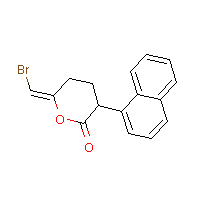

In [9]:
mol = Chem.MolFromSmiles(DF_smiles.loc[1, 'chemblSmiles'])
AllChem.Compute2DCoords(mol)
AllChem.GenerateDepictionMatching2DStructure(mol, mol)
Draw.MolToImage(mol, fitImage = True, size = (200, 200))

### Number of rings

In [10]:
mol.GetRingInfo().NumRings()

3

In [11]:
def checkVariousSmilesProperties(smiles):
    if (checkChargePresence(smiles)):
        response = 100
    elif (checkElementPresence('Br', smiles)):
        response = 10
    elif (checkElementPresence('Cl', smiles)):
        response = 11
    elif (checkElementPresence('I', smiles)):
        response = 12
    elif (checkElementPresence('As', smiles)):
        response = 30
    elif (checkElementPresence('Se', smiles)):
        response = 31
    elif (checkElementPresence('Te', smiles)):
        response = 32
    elif (checkElementPresence('Si', smiles)):
        response = 33
    elif (checkElementPresence('K', smiles)):
        response = 40
    elif (checkElementPresence('Li', smiles)):
        response = 41
    elif (checkElementPresence('Na', smiles)):
        response = 42
    elif (checkElementPresence('Zn', smiles)):
        response = 43
    elif (checkElementPresence('Mg', smiles)):
        response = 44
    elif (checkElementPresence('Au', smiles)):
        response = 50
    elif (checkElementPresence('V', smiles)):
        response = 51
    else:
        response = 0
    return(response)

In [12]:
def checkVariousSmilesProperties(smiles):
    if (checkChargePresence(smiles)):
        response = 100
    else:
        response = 0
    return(response)

In [13]:
import codecs
encodeToUTF8 = False
def canonicalizeSmilesAndProvideDescriptor(smiles):
    #rdkitMol = Chem.MolFromSmiles(molecule)
    #Chem.SanitizeMol(rdkitMol)
    try:
        #newSmiles = Chem.MolToSmiles(rdkitMol, canonical = True, isomericSmiles = False)
        newSmiles, negativeCharged, positiveCharged, elementsList, numberOfRings = provideMoleculeStatistics(smiles)
        #smilesDescription = checkVariousSmilesProperties(newSmiles)
        #elementsSet = provideElementsList(newSmiles)        
    except:
        newSmiles, negativeCharged, positiveCharged, elementsList, numberOfRings = (None, None, None, None, None)
        # There was a trouble in catching the ArgumentError exception (originatefd most likely in Boost.Python 
        # therefore any exceptio s caught here)
        print('Exception!!! :', smiles)
        
    if (encodeToUTF8):
        return((codecs.encode(newSmiles, 'utf-8'), negativeCharged, positiveCharged, elementsList, numberOfRings))
    else:
        return((newSmiles, negativeCharged, positiveCharged, elementsList, numberOfRings))

In [14]:
len(DF_smiles)

679135

In [15]:
#nTotal = len(DF_smiles)
nTotal = 600000
nStart = 0
nSize = 10000
nBatch = np.ceil((nTotal - nStart)/nSize).astype(int)
for iii in range(nBatch):
    iBeg = nStart + iii * nSize
    if (iii == nBatch - 1):
        iEnd = nTotal
    else:
        iEnd = nStart + (iii + 1) * nSize
    print(iii)
    result = DF_smiles.loc[iBeg:iEnd, 'chemblSmiles'].apply(canonicalizeSmilesAndProvideDescriptor)
    DF_smiles.loc[iBeg:iEnd, 'canonicalSmiles'] = [item[0] for item in result]
    DF_smiles.loc[iBeg:iEnd, 'negativeCharged'] = [item[1] for item in result]
    DF_smiles.loc[iBeg:iEnd, 'positiveCharged'] = [item[2] for item in result]
    DF_smiles.loc[iBeg:iEnd, 'elementsSet'] = [item[3] for item in result]
    DF_smiles.loc[iBeg:iEnd, 'numberOfRings'] = [item[4] for item in result]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Exception!!! : Clp1(Cl)np(Cl)(Cl)np2(NNP(=O)(NN2)Oc3ccccc3)n1
41
Exception!!! : CC(Br)C(=O)N=N1=C2C(=Nc3ccccc13)c4cccc5cccc2c45
42
Exception!!! : Clp1(Cl)np(Cl)(Cl)np2(NNP(=S)(NN2)Oc3ccccc3)n1
Exception!!! : CCN1\C(=C\C#C\C(=C/c2sc3ccccc3[n+]2CC)\C)\Sc4ccccc14.[F-][PH2+5]([F-])([F-])([F-])([F-])[F-]
Exception!!! : N1c2ccccc2p3(c4ccccc14)c5ccccc5nc6ccccc36
43
Exception!!! : S=P1(NNp2(NN1)np(np(n2)(N3CC3)N4CC4)(N5CC5)N6CC6)Oc7ccccc7
44
45
46
Exception!!! : N.[Cl-].[Cl-].[Cl-].C1C[O-][Te+4][O-]1
Exception!!! : N.[Cl-].[Cl-].[Cl-].CCCCC1C[O-][Te+4][O-]1
Exception!!! : N.[Cl-].[Cl-].[Cl-].CCCCCCC1C[O-][Te+4][O-]1
47
48
49
50
51
52
53
Exception!!! : CCC1CCCCN1C(=O)N2=NC(=CN2)C(O)(c3ccccc3)c4ccccc4
54
55
56
57
58
Exception!!! : CN1C(=O)NC2=CN3(=C4NC=CC4=C12)CCCCC(C3)N5C(=O)Nc6cnc7[nH]ccc7c56
59


## Get only postprocessed rows

In [16]:
DF_smiles

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean,canonicalSmiles,negativeCharged,positiveCharged,elementsSet,numberOfRings
0,10,2,C1CCCCCNc2cc[n+](Cc3cccc(c3)c4cccc(C[n+]5ccc(N...,110.0000,110.0000,110.0000,0.1100,110.0000,55.055000,c1cc2cc(c1)-c1cccc(c1)C[n+]1ccc(c3ccccc31)NCCC...,0,2,"[N, C]",7
1,23,12,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,100.0000,34000.0000,10724.0775,-5.0000,140.0000,27.733333,O=C1OC(=CBr)CCC1c1cccc2ccccc12,0,0,"[C, Br, O]",3
2,24,1,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,30.0000,30.0000,30.0000,30.0000,30.0000,30.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0,0,"[O, C, I]",3
3,25,1,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,95.0000,95.0000,95.0000,95.0000,95.0000,95.000000,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1,0,0,"[C, O]",3
4,26,1,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,190.0000,190.0000,190.0000,190.0000,190.0000,190.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0,0,"[O, C, I]",3
5,31,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4CC4c5c...,0.5129,0.5129,0.5129,9.2900,9.2900,9.290000,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...,0,0,"[N, C, O]",5
6,33,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)S(=O)(=O)c4cccs4,33.8800,33.8800,33.8800,7.4700,7.4700,7.470000,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC,0,0,"[S, N, C, O]",4
7,38,2,C1CCCCCNc2cc[n+](Cc3ccc(cc3)c4ccc(C[n+]5ccc(NC...,170.0000,170.0000,170.0000,0.1700,170.0000,85.085000,c1ccc2c(c1)c1cc[n+]2Cc2ccc(cc2)-c2ccc(cc2)C[n+...,0,2,"[N, C]",9
8,39,3,Nc1cc[n+](Cc2cccc(c2)c3cccc(C[n+]4ccc(N)c5cccc...,290.0000,290.0000,290.0000,0.2900,290.0000,96.860000,Nc1cc[n+](Cc2cccc(-c3cccc(C[n+]4ccc(N)c5ccccc5...,0,2,"[N, C]",6
9,46,3,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc45...,410.0000,410.0000,410.0000,0.4100,410.0000,136.940000,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc54...,0,2,"[N, C]",6


In [18]:
DF_smiles = DF_smiles[[not item for item in pd.isna(DF_smiles['canonicalSmiles'])]]
#DF_smiles = DF_smiles[DF_smiles['canonicalSmiles'].notnull()]

In [19]:
DF_smiles.to_csv('DF_GI50_IC50_groupedSanitized.csv', index = False)

In [87]:
DF_smiles = pd.read_csv('DF_GI50_IC50_groupedSanitized.csv')

In [88]:
import ast
DF_smiles.loc[:, 'elementsSet'] = DF_smiles.loc[:, 'elementsSet'].map(lambda x: ast.literal_eval(x))

In [90]:
DF_smiles.head(10)

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean,canonicalSmiles,negativeCharged,positiveCharged,elementsSet,numberOfRings
0,10,2,C1CCCCCNc2cc[n+](Cc3cccc(c3)c4cccc(C[n+]5ccc(N...,110.0000,110.0000,110.0000,0.11,110.00,55.055000,c1cc2cc(c1)-c1cccc(c1)C[n+]1ccc(c3ccccc31)NCCC...,0.0,2.0,"[N, C]",7.0
1,23,12,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,100.0000,34000.0000,10724.0775,-5.00,140.00,27.733333,O=C1OC(=CBr)CCC1c1cccc2ccccc12,0.0,0.0,"[C, Br, O]",3.0
2,24,1,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,30.0000,30.0000,30.0000,30.00,30.00,30.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"[O, C, I]",3.0
3,25,1,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,95.0000,95.0000,95.0000,95.00,95.00,95.000000,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1,0.0,0.0,"[C, O]",3.0
4,26,1,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,190.0000,190.0000,190.0000,190.00,190.00,190.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"[O, C, I]",3.0
5,31,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4CC4c5c...,0.5129,0.5129,0.5129,9.29,9.29,9.290000,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...,0.0,0.0,"[N, C, O]",5.0
6,33,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)S(=O)(=O)c4cccs4,33.8800,33.8800,33.8800,7.47,7.47,7.470000,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC,0.0,0.0,"[S, N, C, O]",4.0
7,38,2,C1CCCCCNc2cc[n+](Cc3ccc(cc3)c4ccc(C[n+]5ccc(NC...,170.0000,170.0000,170.0000,0.17,170.00,85.085000,c1ccc2c(c1)c1cc[n+]2Cc2ccc(cc2)-c2ccc(cc2)C[n+...,0.0,2.0,"[N, C]",9.0
8,39,3,Nc1cc[n+](Cc2cccc(c2)c3cccc(C[n+]4ccc(N)c5cccc...,290.0000,290.0000,290.0000,0.29,290.00,96.860000,Nc1cc[n+](Cc2cccc(-c3cccc(C[n+]4ccc(N)c5ccccc5...,0.0,2.0,"[N, C]",6.0
9,46,3,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc45...,410.0000,410.0000,410.0000,0.41,410.00,136.940000,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc54...,0.0,2.0,"[N, C]",6.0


In [91]:
organicChemistryList = ['B', 'C', 'N', 'O', 'P', 'S', 'F', 'Cl', 'Br', 'I']

In [92]:
organicChemistrySet = set(organicChemistryList)

## Subset check test

In [25]:
testSet = set(['N', 'C', 'Cl', 'Na'])

In [26]:
testSet

{'C', 'Cl', 'N', 'Na'}

In [27]:
testSet < organicChemistrySet

False

## Check if smile contains only the elements from the orgranic chemistry set

In [93]:
DF_smiles.loc[:, 'organicChemistryElementsOnly'] = DF_smiles.loc[:, 'elementsSet'].map(lambda x: set(x) < organicChemistrySet)

In [94]:
DF_smiles.head(10)

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean,canonicalSmiles,negativeCharged,positiveCharged,elementsSet,numberOfRings,organicChemistryElementsOnly
0,10,2,C1CCCCCNc2cc[n+](Cc3cccc(c3)c4cccc(C[n+]5ccc(N...,110.0000,110.0000,110.0000,0.11,110.00,55.055000,c1cc2cc(c1)-c1cccc(c1)C[n+]1ccc(c3ccccc31)NCCC...,0.0,2.0,"[N, C]",7.0,True
1,23,12,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,100.0000,34000.0000,10724.0775,-5.00,140.00,27.733333,O=C1OC(=CBr)CCC1c1cccc2ccccc12,0.0,0.0,"[C, Br, O]",3.0,True
2,24,1,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,30.0000,30.0000,30.0000,30.00,30.00,30.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"[O, C, I]",3.0,True
3,25,1,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,95.0000,95.0000,95.0000,95.00,95.00,95.000000,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1,0.0,0.0,"[C, O]",3.0,True
4,26,1,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,190.0000,190.0000,190.0000,190.00,190.00,190.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"[O, C, I]",3.0,True
5,31,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4CC4c5c...,0.5129,0.5129,0.5129,9.29,9.29,9.290000,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...,0.0,0.0,"[N, C, O]",5.0,True
6,33,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)S(=O)(=O)c4cccs4,33.8800,33.8800,33.8800,7.47,7.47,7.470000,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC,0.0,0.0,"[S, N, C, O]",4.0,True
7,38,2,C1CCCCCNc2cc[n+](Cc3ccc(cc3)c4ccc(C[n+]5ccc(NC...,170.0000,170.0000,170.0000,0.17,170.00,85.085000,c1ccc2c(c1)c1cc[n+]2Cc2ccc(cc2)-c2ccc(cc2)C[n+...,0.0,2.0,"[N, C]",9.0,True
8,39,3,Nc1cc[n+](Cc2cccc(c2)c3cccc(C[n+]4ccc(N)c5cccc...,290.0000,290.0000,290.0000,0.29,290.00,96.860000,Nc1cc[n+](Cc2cccc(-c3cccc(C[n+]4ccc(N)c5ccccc5...,0.0,2.0,"[N, C]",6.0,True
9,46,3,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc45...,410.0000,410.0000,410.0000,0.41,410.00,136.940000,Nc1cc[n+](Cc2ccc(CCc3ccc(C[n+]4ccc(N)c5ccccc54...,0.0,2.0,"[N, C]",6.0,True


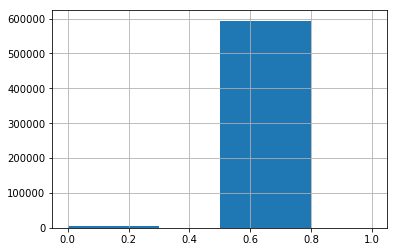

In [95]:
plt.hist(DF_smiles['organicChemistryElementsOnly'], bins = 2, width = 0.3)
plt.grid()
plt.show()

## Length of smiles

In [96]:
DF_smiles.loc[:, 'smilesLength'] = DF_smiles.loc[:, 'canonicalSmiles'].map(lambda x: len(x))

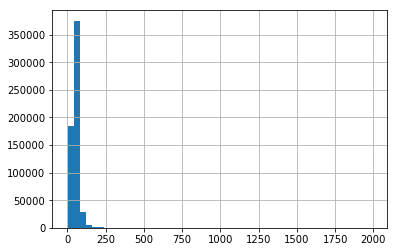

In [97]:
plt.hist(DF_smiles.loc[:, 'smilesLength'], bins = 50)
plt.grid()
plt.show()

## Get only the smiles that: are not longer than 100 characters, are not charged and are composed from organic chemistry elements

In [99]:
limitSmilesLength = 100
DF_chosen = DF_smiles[(DF_smiles['smilesLength'] < limitSmilesLength) & \
                      (DF_smiles['negativeCharged'] == 0) & \
                      (DF_smiles['positiveCharged'] == 0) & \
                      (DF_smiles['numberOfRings'] <= 5) & \
                      (DF_smiles['organicChemistryElementsOnly'])]

In [100]:
DF_chosen

,molregNoMin,molregNoCount,chemblSmiles,standardMin,standardMax,standardMean,publishedMain,publishedMax,publishedMean,canonicalSmiles,negativeCharged,positiveCharged,elementsSet,numberOfRings,organicChemistryElementsOnly,smilesLength
1,23,12,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,100.000000,34000.000000,10724.077500,-5.000000e+00,140.00,27.733333,O=C1OC(=CBr)CCC1c1cccc2ccccc12,0.0,0.0,"[C, Br, O]",3.0,True,30
2,24,1,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,30.000000,30.000000,30.000000,3.000000e+01,30.00,30.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"[O, C, I]",3.0,True,29
3,25,1,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,95.000000,95.000000,95.000000,9.500000e+01,95.00,95.000000,C#CC=C1CCC(c2cccc3ccccc23)C(=O)O1,0.0,0.0,"[C, O]",3.0,True,33
4,26,1,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,190.000000,190.000000,190.000000,1.900000e+02,190.00,190.000000,O=C1OC(=CI)CCC1c1cccc2ccccc12,0.0,0.0,"[O, C, I]",3.0,True,29
5,31,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4CC4c5c...,0.512900,0.512900,0.512900,9.290000e+00,9.29,9.290000,COc1cc2nc(N3CCN(C(=O)C4CC4c4ccccc4)CC3)nc(N)c2...,0.0,0.0,"[N, C, O]",5.0,True,51
6,33,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)S(=O)(=O)c4cccs4,33.880000,33.880000,33.880000,7.470000e+00,7.47,7.470000,COc1cc2nc(N3CCN(S(=O)(=O)c4cccs4)CC3)nc(N)c2cc1OC,0.0,0.0,"[S, N, C, O]",4.0,True,49
19,58,1,COC(=O)\C=C\C(=O)Nc1ccc(CCCCC(=O)N2CCN(CC2)c3n...,4.467000,4.467000,4.467000,8.350000e+00,8.35,8.350000,COC(=O)C=CC(=O)Nc1ccc(CCCCC(=O)N2CCN(c3nc(N)c4...,0.0,0.0,"[N, C, O]",4.0,True,70
20,59,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)CCc4ccccc4,3.388000,3.388000,3.388000,8.470000e+00,8.47,8.470000,COc1cc2nc(N3CCN(C(=O)CCc4ccccc4)CC3)nc(N)c2cc1OC,0.0,0.0,"[N, C, O]",4.0,True,48
21,60,1,COc1ccc(\C=C\C(=O)N2CCN(CC2)c3nc(N)c4cc(OC)c(O...,3.388000,3.388000,3.388000,8.470000e+00,8.47,8.470000,COc1ccc(C=CC(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n...,0.0,0.0,"[N, C, O]",4.0,True,55
22,61,1,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)\C=C\c4c...,20.890000,20.890000,20.890000,7.680000e+00,7.68,7.680000,COc1cc2nc(N3CCN(C(=O)C=Cc4cccc(F)c4)CC3)nc(N)c...,0.0,0.0,"[F, N, C, O]",4.0,True,52


## Encode two-character elements and [nH] pieces

In [101]:
def encodeElement(series, source, destination):
    return series.map(lambda x: x.replace(source, destination))

In [102]:
DF_chosen.loc[:, 'encodedSmiles'] = DF_chosen.loc[:, 'canonicalSmiles']

C:\Tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 'Br' -> 'G'

In [103]:
DF_chosen.loc[:, 'encodedSmiles'] = encodeElement(DF_chosen.loc[:, 'encodedSmiles'], 'Br', 'G')

C:\Tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 'Cl' -> 'U'

In [104]:
DF_chosen.loc[:, 'encodedSmiles'] = encodeElement(DF_chosen.loc[:, 'encodedSmiles'], 'Cl', 'U')

C:\Tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### [nH] -> 'W'

In [105]:
DF_chosen.loc[:, 'encodedSmiles'] = encodeElement(DF_chosen.loc[:, 'encodedSmiles'], '[nH]', 'W')

C:\Tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Check the charset

In [106]:
from functools import reduce
def provideSampleCharset(data):
    structures = data.tolist()
    charset = list(reduce(lambda x, y: set(y) | x, structures, set()))
    return(sorted(charset))

In [107]:
print(provideSampleCharset(DF_chosen['encodedSmiles']), len(provideSampleCharset(DF_chosen['encodedSmiles'])))

['#', '(', ')', '-', '.', '1', '2', '3', '4', '5', '=', 'B', 'C', 'F', 'G', 'H', 'I', 'N', 'O', 'P', 'S', 'U', 'W', '[', ']', 'c', 'n', 'o', 's'] 29


In [43]:
def findSmilesWithCertainCharacters(data, sequence):
    result = []
    for index, item in enumerate(data):
        if (item.find(sequence) != -1):
            result.append((index, item))
    return(result)

### Remove the '-', the redundant aliphatic bond

In [121]:
DF_chosen['encodedSmiles'] = DF_chosen['encodedSmiles'].map(lambda x: x.replace('-', ''))

C:\Tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
findSmilesWithCertainCharacters(DF_chosen['encodedSmiles'], '-')

[]

In [123]:
print(provideSampleCharset(DF_chosen['encodedSmiles']), len(provideSampleCharset(DF_chosen['encodedSmiles'])))

['#', '(', ')', '.', '1', '2', '3', '4', '5', '=', 'B', 'C', 'F', 'H', 'I', 'L', 'N', 'O', 'P', 'S', 'U', 'W', '[', ']', 'c', 'n', 'o', 's'] 28


In [108]:
smilesSample = list(DF_chosen.sample(200)['canonicalSmiles'].values)

In [109]:
mols = []
for smiles in smilesSample:
    mol = Chem.MolFromSmiles(smiles)
    AllChem.Compute2DCoords(mol)
    mols.append(mol)

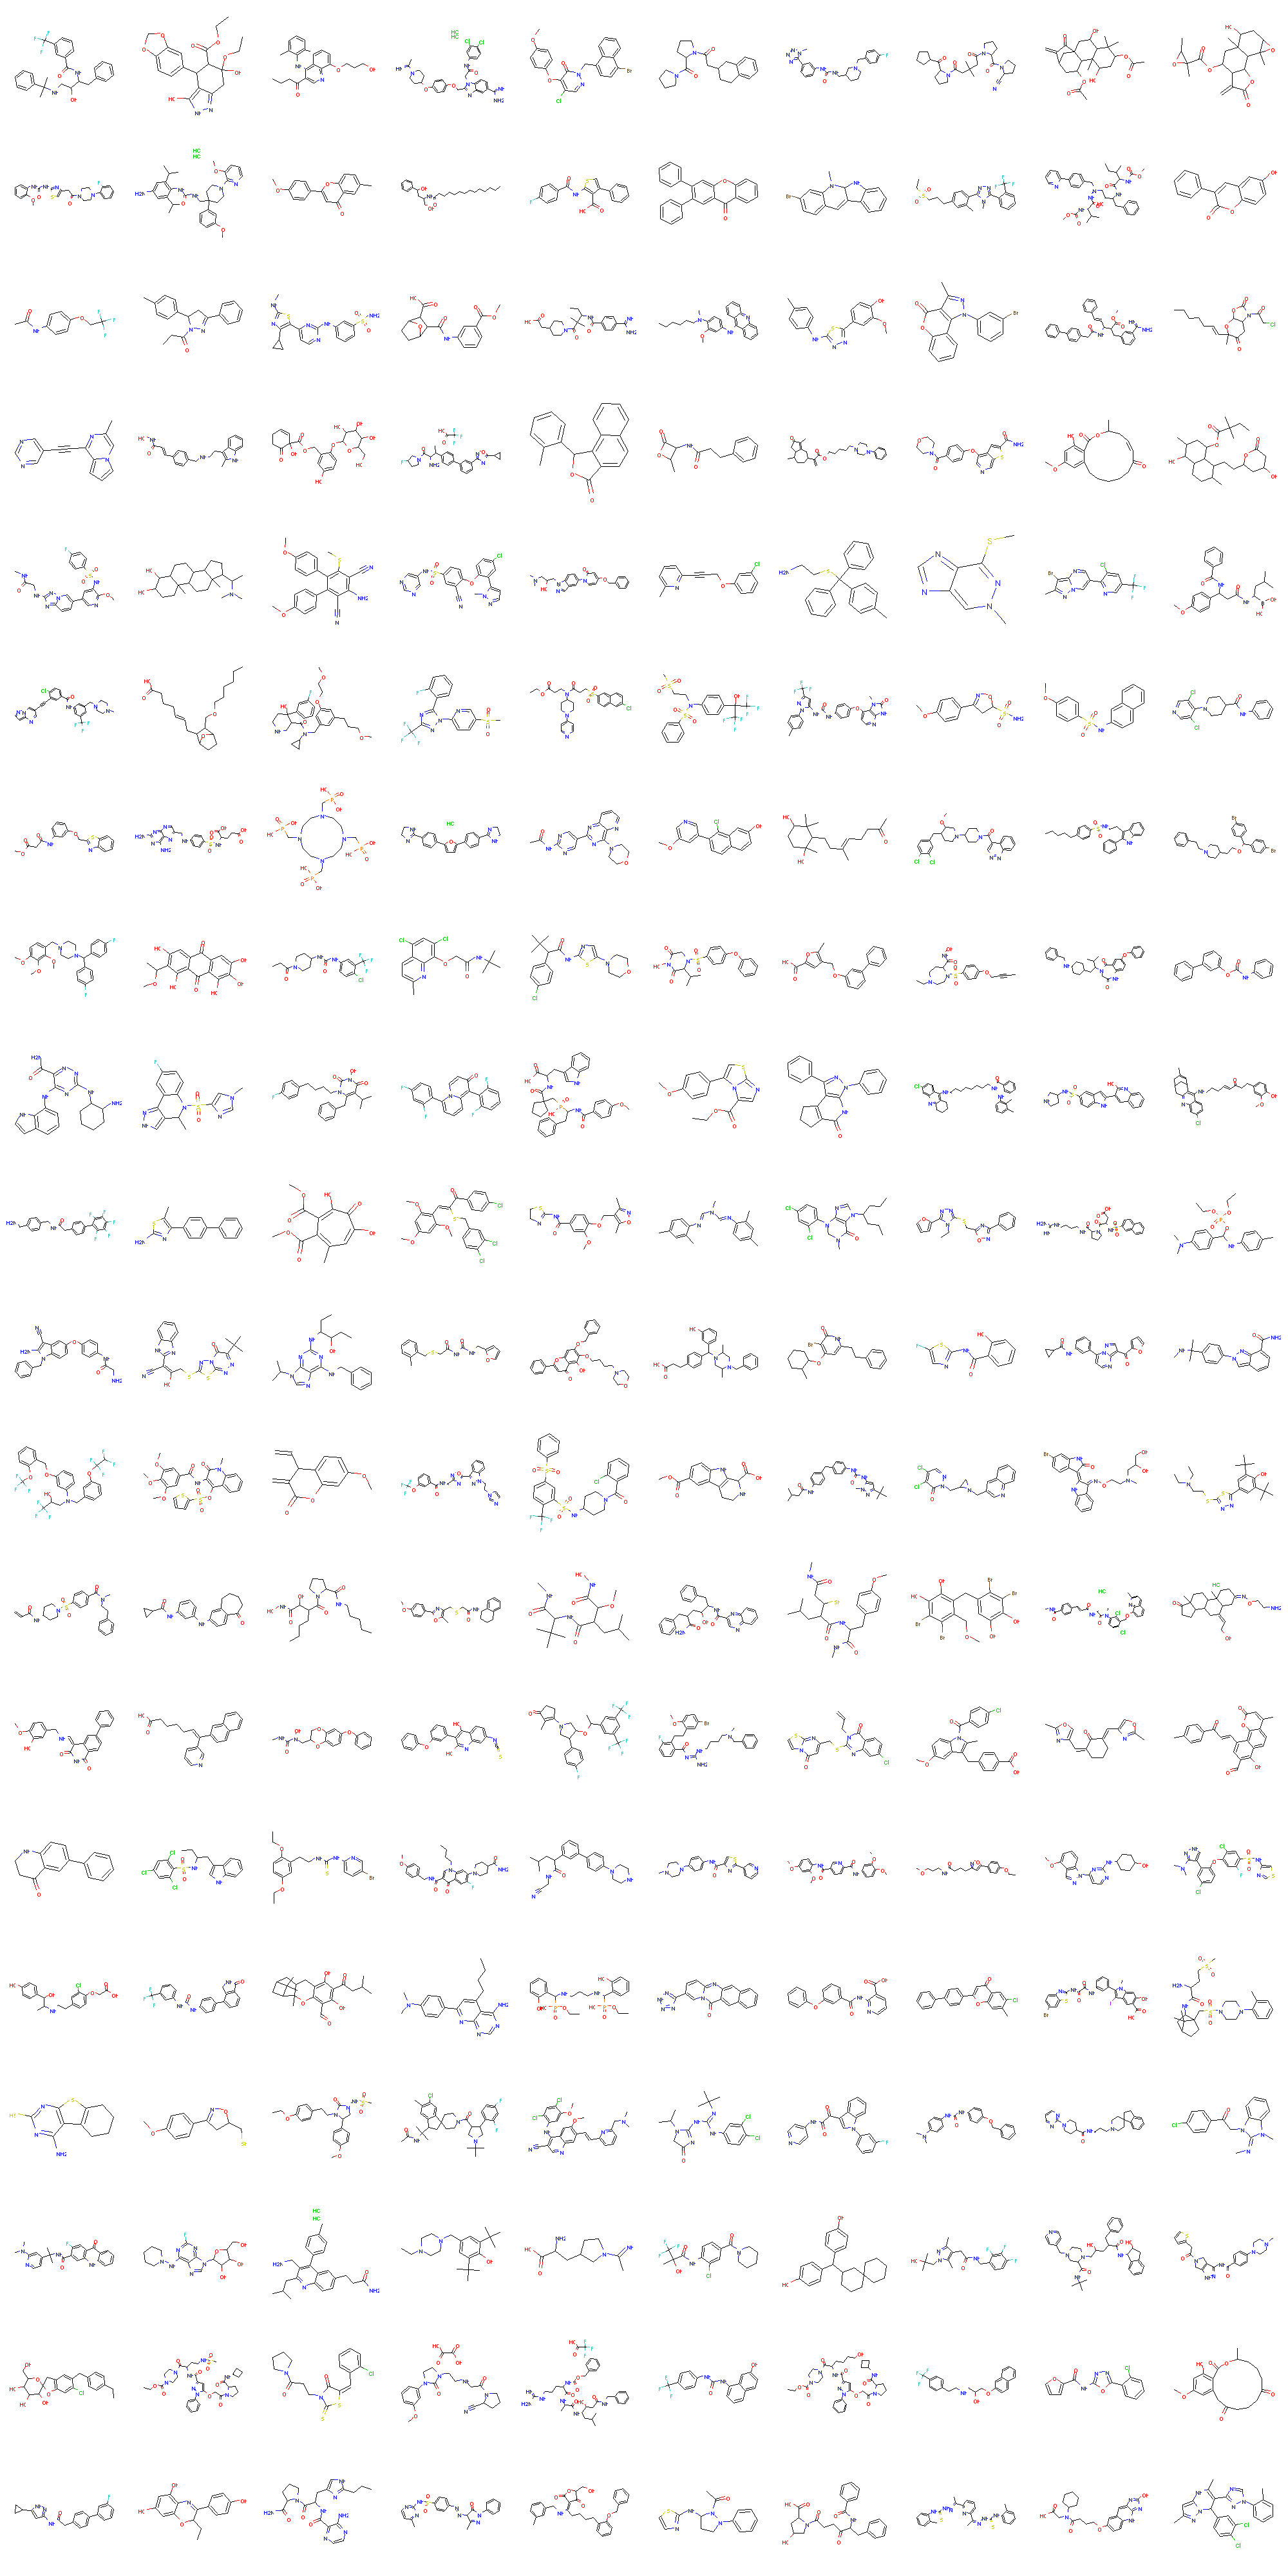

In [110]:
#Draw.MolsToImage()
Draw.MolsToGridImage(mols, molsPerRow=10)
#Draw.MolsToImage(mols, subImgSize=(200, 200))

In [111]:
maxLenSmiles = np.max(DF_chosen.loc[:, 'smilesLength'])
maxLenSmiles

99

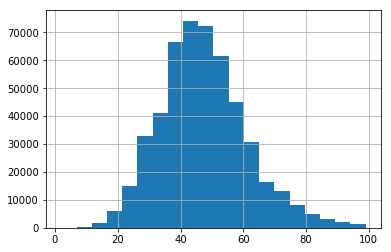

In [112]:
plt.hist(DF_chosen.loc[:, 'smilesLength'], bins = 20)
plt.grid()
plt.show()

## Store on file

In [113]:
DF_chosen.to_csv('DF_GI50_IC50_groupedSanitizedChosen.csv', index = False)

## Molecular descriptor

In [ ]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint

In [ ]:
import codecs
encodeToUTF8 = False
def canonicalizeSmiles(molecule):
    rdkitMol = Chem.MolFromSmiles(molecule)
    try:
        newSmiles = Chem.MolToSmiles(rdkitMol)
    except ArgumentError:
        newSmiles = None
    if (encodeToUTF8):
        return(codecs.encode(newSmiles, 'utf-8'))
    else:
        return(newSmiles)

In [ ]:
list(DF_smiles.loc[:5, 'canonicalSmiles'])

In [ ]:
mols = [Chem.MolFromSmiles(smile) for smile in DF_smiles.loc[:5, 'canonicalSmiles']]

In [ ]:
fps = [GetMorganFingerprint(x, 2) for x in mols]

In [ ]:
print(DF_smiles.loc[0, 'canonicalSmiles'])
print(Chem.MolToSmiles(mols[0]))

## Check with rdkit

In [ ]:
import codecs
encodeToUTF8 = False
def canonicalizeSmiles(molecule):
    rdkitMol = Chem.MolFromSmiles(molecule)
    newSmiles = Chem.MolToSmiles(rdkitMol)
    if (encodeToUTF8):
        return(codecs.encode(newSmiles, 'utf-8'))
    else:
        return(newSmiles)

In [ ]:
smiles_column = 'canonical_smiles_RDKit'
data.loc[:, smiles_column] = data.loc[:, 'canonical_smiles'].apply(canonicalizeSmiles)

In [ ]:
data.loc[:10, smiles_column]

# Preparation for Autoencoders
## Get just structures, left-justified

In [ ]:
# left-adjusted, padded with space to equalize the max. length 
structures = data[smiles_column].map(lambda x: list(x.ljust(maxLenSmiles)))

In [ ]:
type(structures)

In [ ]:
print(structures[0])

In [ ]:
iii = 0
for structure in structures:
    isSpace = any([item == ' ' for item in structure])
    if (isSpace):
        print(iii, structure)
    iii += 1
    #any(' ' in structure)

In [ ]:
from sklearn.model_selection import train_test_split
trainIdx, testIdx = map(np.array, train_test_split(structures.index, test_size = 0.20))

In [ ]:
from functools import reduce

## How reduce works

In [ ]:
# The calculation sequence is the following:
# 1. tmp1 = set('a') | set('x')
# 2. tmp2 = set('b') | tmp1
# 3. tmp3 = set('c') | tmp2
tmp = ['a', 'b', 'c']
reduce(lambda x, y: set(y) | x, tmp, set('x'))

## Create the charset

In [ ]:
charset = list(reduce(lambda x, y: set(y) | x, structures, set()))

In [ ]:
type(charset)

In [ ]:
nCharset = len(charset)
nCharset

In [ ]:
print(charset)

## One-hot encoding of the molecules

### Auxiliary functions

In [ ]:
def one_hot_array(i, n):
    return map(int, [ix == i for ix in range(n)])

def one_hot_index(vec, charset):
    return map(charset.index, vec)

### The generator that, for given SMILES code, provides the one-hot representation of it
* The structures have the same lengths (*maxLenSmiles*)
* To get the data one needs to iterate over characters in SMILES

In [ ]:
def oneHotEncodedMolecule(structures, charset):
    for smiles in structures:
        yield(map(lambda x: one_hot_array(x, len(charset)), one_hot_index(smiles, charset)))

## Storing the data on file

In [ ]:
import h5py
outputFile = 'postprocessed.h5'
h5f = h5py.File(outputFile, 'w')
h5f.create_dataset('charset', data = [codecs.encode(item, encoding = 'utf-8') for item in charset])
h5f.close()

### Function that stores the matrices on the HDF5 file

In [ ]:
def storeData(savingStructures, outputFile, dataSetName, chunkSize = 1000):

    h5f = h5py.File(outputFile, 'r+')
    dataset_shape = (len(savingStructures), maxLenSmiles, len(charset))
    newData = h5f.create_dataset(dataSetName, dataset_shape, chunks = tuple([chunkSize]+list(dataset_shape[1:])))

    nChunks = np.ceil(len(savingStructures) / chunkSize)
    #dataChunk = np.zeros(shape = (chunkSize, maxLenSmiles, nCharset))
    
    for jjj in range(int(nChunks)):
        beg = jjj * chunkSize
        if (jjj == nChunks - 1):
            end = len(savingStructures)
        else:
            end = (jjj + 1) * chunkSize
        print(beg, end)
        smilesGenerator = oneHotEncodedMolecule(savingStructures[beg:end], charset)
        iii = 0
        while True:
            try: 
                newData[jjj*chunkSize + iii,] = np.array([list(item) for item in next(smilesGenerator)])
                iii += 1
            except StopIteration:
                break

    h5f.close()

In [ ]:
storeData(savingStructures = structures[trainIdx], dataSetName ='data_train', outputFile = outputFile)

## Check if data is written correctly, reading in the charset and molecular matrices

In [ ]:
inputFile = 'postprocessed.h5'
h5f = h5py.File(inputFile, 'r')
readCharset = h5f.get('charset')[:]
data = h5f.get('data_train')[:]
#np.array(data, shape = ())
h5f.close()

In [ ]:
data.shape

### Decoding the charset

In [ ]:
import codecs
#codecs.decode(readCharset, 'ascii')
readCharset = [codecs.decode(item, encoding = 'ascii') for item in readCharset]

### Decoding molecules

In [ ]:
def from_one_hot_array(vec):
    oh = np.where(vec == 1)
    if oh[0].shape == (0, ):
        return None
    return int(oh[0][0])

def decode_smiles_from_indexes(vec, charset):
    return "".join(map(lambda x: charset[x], vec)).strip()

### Check if the first read molecule is the same as the first training instance

In [ ]:
smilesCode = [from_one_hot_array(data[0, iii, :]) for iii in range(maxLenSmiles)]
decode_smiles_from_indexes(smilesCode, readCharset)

In [ ]:
"".join(structures[trainIdx[0]])


### Same for other test instace

In [ ]:
smilesGenerator = oneHotEncodedMolecule([structures[0]], charset)
dataOne = np.array([list(item) for item in next(smilesGenerator)])

In [ ]:
dataOne.shape

In [ ]:
smilesCode = [from_one_hot_array(dataOne[iii, :]) for iii in range(maxLenSmiles)]
decode_smiles_from_indexes(smilesCode, charset)

In [ ]:
"".join(structures[0])

# RNN-molecule
* 1 A. Gupta, A.T. Müller, B.J.H. Huisman, J.A. Fuchs, P. Schneider, and G. Schneider, Molecular Informatics 37, 1700111 (2018).

In [ ]:
data

In [ ]:
data[data['smiles_length'] > 150]

## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras.optimizers import RMSprop


model = Sequential()
model.add(LSTM(128, input_shape=(maxLenSmiles, len(readCharset)), return_sequences = False))
#model.add(Dropout(0.2))
#model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(readCharset)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)